What is the relationship between the stroke population to diabetes, heart disease, and high blood pressure in respect to geographical area?
Five factors contribute to stroke.  
1.	Diabetes
2.	Heart Disease
3.	High Blood Pressure
4.	High Cholesterol
5.	Obesity


In [1]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
#import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 
import seaborn as sns 
%matplotlib inline

df1 = pd.read_csv("Daignosed_Ob_df01.csv" )
df2 = pd.read_csv("Diagnosed_Db_df01.csv" )
df3 = pd.read_csv("Diagnosed_HBp_df01.csv" )
df4 = pd.read_csv("Diagnosed_Hc_df01.csv" )
df5 = pd.read_csv("Diagnosed_Hd_df01.csv" )
df6 = pd.read_csv("Diagnosed_STr_df01.csv" )


%pip install scikit-learn  --upgrade --force
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split


  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dolly\\AppData\\Local\\r-miniconda\\envs\\datascience-pro-env\\Lib\\site-packages\\~-~py\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [2]:
df6 = df6.drop(columns = ['StkCity','StkLowFid', 'StkHighFid', 'StkMeanByUS', 'StkRelByUS',
       'Stk_Lat', 'Stk_Log'])
df6 = df6.rename(columns={'StkMean':'Target'})

In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
df.head().T

,0,1,2,3,4
ObCity,Ob_AK_Anchorage,Ob_AK_Anchorage,Ob_AK_Anchorage,Ob_AK_Anchorage,Ob_AK_Anchorage
ObMean,36.3,33.5,39.0,33.4,33.2
ObLowFid,35.0,32.1,38.2,32.0,31.5
ObHighFid,37.6,34.7,39.8,34.8,34.6
ObMeanByUS,30.1,30.1,30.1,30.1,30.1
DbRelByUS,0.21,0.11,0.3,0.11,0.1
Ob_Lat,61.210286,61.159394,61.223372,61.188019,61.330877
Ob_Log,-149.875983,-149.899867,-149.723323,-149.763397,-149.574747
DbCity,Db_AK_Anchorage,Db_AK_Anchorage,Db_AK_Anchorage,Db_AK_Anchorage,Db_AK_Anchorage
DbMean,7.4,8.9,8.2,6.1,7.3


In [4]:
#df6.info
#df6.head()
#df6
#df6.columns
#df6.describe()
#df6.to_numeric(df6['StkMean'])
#df6.isna().sum()

In [5]:
#https://www.youtube.com/watch?v=wzN1UyfRSWI&t=444s
df = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)



In [6]:
#print("Index:  ", df.index)
#print("Columns:", df.columns)
#print("Size:   ", df.size)
#print("Shape:  ", df.shape)
#df.isna().sum()
#df.isna().sum()
#df.head().T
#df.head()
#df.info()
#df.shape 
#df.describe().T # run a quick stat 
df.columns

Index(['ObCity', 'ObMean', 'ObLowFid', 'ObHighFid', 'ObMeanByUS', 'DbRelByUS',
       'Ob_Lat', 'Ob_Log', 'DbCity', 'DbMean', 'DbLowFid', 'DbHighFid',
       'DbMeanByUS', 'DbRelByUS', 'Db_Lat', 'Db_Log', 'HBp_City', 'HBpMean',
       'HBpLowFid', 'HBpHighFid', 'HBpMeanByUS', 'HBpRelByUS', 'HBp_Lat',
       'HBp_Logit', 'Hc_City', 'HcMean', 'HcLowFid', 'HcHighFid', 'HcMeanByUS',
       'HcRelByUS', 'Hc_Lat', 'Hc_Log', 'Hd_City', 'HdMean', 'HdLowFid',
       'HdHighFid', 'HdMeanByUS', 'HdRelByUS', 'Hd_Lat', 'Hd_Log', 'Target'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28004 entries, 0 to 28003
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ObCity       28004 non-null  object 
 1   ObMean       28004 non-null  float64
 2   ObLowFid     28004 non-null  float64
 3   ObHighFid    28004 non-null  float64
 4   ObMeanByUS   28004 non-null  float64
 5   DbRelByUS    28004 non-null  float64
 6   Ob_Lat       28004 non-null  float64
 7   Ob_Log       28004 non-null  float64
 8   DbCity       28004 non-null  object 
 9   DbMean       28004 non-null  float64
 10  DbLowFid     28004 non-null  float64
 11  DbHighFid    28004 non-null  float64
 12  DbMeanByUS   28004 non-null  float64
 13  DbRelByUS    28004 non-null  float64
 14  Db_Lat       28004 non-null  float64
 15  Db_Log       28004 non-null  float64
 16  HBp_City     28004 non-null  object 
 17  HBpMean      28004 non-null  float64
 18  HBpLowFid    28004 non-null  float64
 19  HBpH

In [8]:
#Dropping all the (str) from the model
df = df.drop(columns = ['ObCity', 'Ob_Lat', 'Ob_Log', 'DbCity','Db_Lat', 'Db_Log', 'HBp_City', 'HBp_Lat',
'HBp_Logit', 'Hc_City','Hd_City', 'Hc_Lat', 'Hc_Log', 'Hd_City','Hd_Lat', 'Hd_Log' ])

In [9]:
df["Target"].describe()

count    28004.000000
mean         3.116091
std          1.532435
min          0.000000
25%          2.200000
50%          2.800000
75%          3.700000
max         19.500000
Name: Target, dtype: float64

In [10]:
df.describe()


,ObMean,ObLowFid,ObHighFid,ObMeanByUS,DbRelByUS,DbMean,DbLowFid,DbHighFid,DbMeanByUS,DbRelByUS,...,HcLowFid,HcHighFid,HcMeanByUS,HcRelByUS,HdMean,HdLowFid,HdHighFid,HdMeanByUS,HdRelByUS,Target
count,28004.000000,28004.000000,28004.000000,2.800400e+04,28004.000000,28004.000000,28004.000000,28004.000000,2.800400e+04,28004.000000,...,28004.000000,28004.000000,2.800400e+04,28004.000000,28004.000000,28004.000000,28004.000000,2.800400e+04,28004.000000,28004.000000
mean,29.608920,28.437712,30.733995,3.010000e+01,-0.015563,10.504428,9.833888,11.183467,1.080000e+01,-0.027401,...,29.675825,31.299582,3.410000e+01,-0.105479,5.443115,4.967551,5.956595,6.400000e+00,-0.145373,3.116091
std,9.518882,9.340723,9.665481,1.476534e-11,0.313997,4.575311,4.335733,4.804359,5.705760e-12,0.421003,...,6.929700,7.258800,1.576722e-11,0.204401,2.288458,2.077312,2.520051,3.317406e-12,0.346721,1.532435
min,0.000000,0.000000,0.000000,3.010000e+01,-0.970000,0.000000,0.000000,0.000000,1.080000e+01,-1.000000,...,0.000000,0.000000,3.410000e+01,-0.970000,0.000000,0.000000,0.000000,6.400000e+00,-0.950000,0.000000
25%,24.000000,22.800000,25.100000,3.010000e+01,-0.200000,7.700000,7.100000,8.300000,1.080000e+01,-0.290000,...,27.700000,29.300000,3.410000e+01,-0.160000,4.100000,3.700000,4.500000,6.400000e+00,-0.360000,2.200000
50%,29.200000,28.000000,30.500000,3.010000e+01,-0.030000,9.900000,9.300000,10.600000,1.080000e+01,-0.080000,...,30.700000,32.400000,3.410000e+01,-0.080000,5.300000,4.800000,5.800000,6.400000e+00,-0.170000,2.800000
75%,35.400000,34.200000,36.600000,3.010000e+01,0.180000,12.800000,12.100000,13.600000,1.080000e+01,0.190000,...,33.400000,35.200000,3.410000e+01,0.010000,6.600000,6.100000,7.300000,6.400000e+00,0.030000,3.700000
max,58.600000,57.200000,59.900000,3.010000e+01,0.950000,39.500000,36.400000,42.200000,1.080000e+01,2.660000,...,53.600000,57.200000,3.410000e+01,0.620000,35.800000,32.300000,39.200000,6.400000e+00,4.590000,19.500000


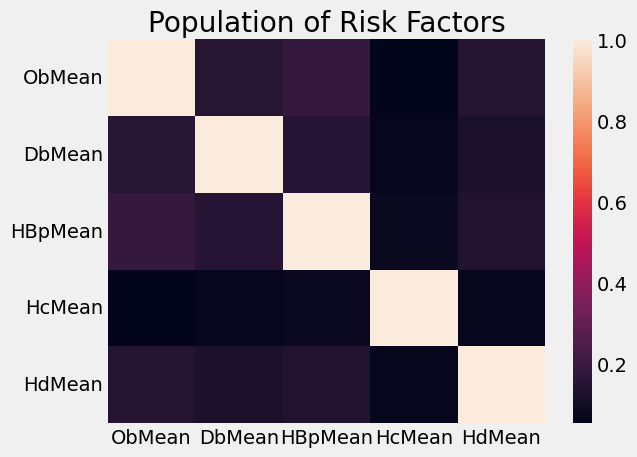

In [44]:
#Heatmap
# Summary: Distribution of all the factors from cities in the US. 
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['ObMean',  'DbMean', 'HBpMean','HcMean', 'HdMean']].corr()
sns.heatmap(df_corr)
plt.show()

Histrogram
1.	Diabetes
2.	Heart Disease
3.	High Blood Pressure
4.	High Cholesterol
5.	Obesity

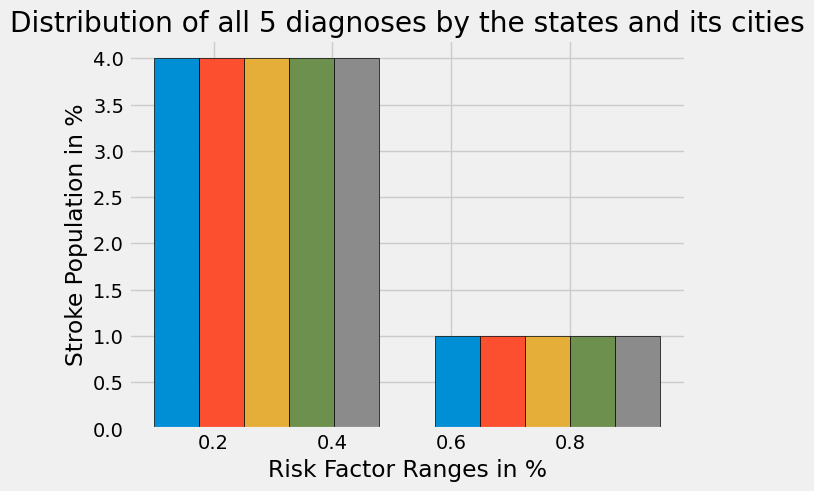

In [58]:
plt.title('Distribution of all 5 diagnoses by the states and its cities')
plt.xlabel('Risk Factor Ranges in %')
plt.ylabel('Stroke Population in %')
#plt.tight_layout()
df_corr = df[['ObMean',  'DbMean', 'HBpMean','HcMean', 'HdMean']].corr()
#bins = [200, 400, 800, 1200, 1600, 2000, 2200, 2400, 2800, 3200] # 12 ranges starts at 500.
plt.hist(df_corr, bins=2, edgecolor='black')
plt.show()

In [12]:
## Dividing the dataset into independent and dependent features.
X=df.iloc[:, :-1] # Independent features.
y=df.iloc[:, -1]  # dependent features.

In [13]:
# int/float, after dropping
X

,ObMean,ObLowFid,ObHighFid,ObMeanByUS,DbRelByUS,DbMean,DbLowFid,DbHighFid,DbMeanByUS,DbRelByUS,...,HcMean,HcLowFid,HcHighFid,HcMeanByUS,HcRelByUS,HdMean,HdLowFid,HdHighFid,HdMeanByUS,HdRelByUS
0,36.3,35.0,37.6,30.1,0.21,7.4,6.9,7.8,10.8,-0.31,...,32.3,31.1,33.4,34.1,-0.05,4.2,4.2,4.2,6.4,-0.34
1,33.5,32.1,34.7,30.1,0.11,8.9,8.3,9.6,10.8,-0.18,...,33.0,32.4,33.6,34.1,-0.03,4.7,4.5,5.0,6.4,-0.27
2,39.0,38.2,39.8,30.1,0.30,8.2,7.8,8.6,10.8,-0.24,...,31.9,31.3,32.4,34.1,-0.06,5.8,5.2,6.4,6.4,-0.09
3,33.4,32.0,34.8,30.1,0.11,6.1,5.4,6.8,10.8,-0.44,...,29.3,28.5,30.2,34.1,-0.14,4.4,4.1,4.8,6.4,-0.31
4,33.2,31.5,34.6,30.1,0.10,7.3,6.7,7.9,10.8,-0.32,...,31.4,30.6,32.2,34.1,-0.08,4.0,3.6,4.4,6.4,-0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27999,28.9,27.6,30.3,30.1,-0.04,9.0,8.2,9.9,10.8,-0.17,...,29.4,28.6,30.1,34.1,-0.14,3.3,2.9,3.6,6.4,-0.48
28000,29.7,28.4,31.0,30.1,-0.01,7.4,6.9,7.9,10.8,-0.31,...,30.8,29.8,31.9,34.1,-0.10,4.9,4.4,5.4,6.4,-0.23
28001,28.4,26.9,29.8,30.1,-0.06,8.9,8.1,9.7,10.8,-0.18,...,32.9,31.9,33.9,34.1,-0.04,6.7,5.9,7.5,6.4,0.05
28002,27.2,26.0,28.4,30.1,-0.10,9.1,8.3,9.9,10.8,-0.16,...,31.6,30.7,32.5,34.1,-0.07,5.2,4.7,5.7,6.4,-0.19


In [14]:
# laod types of model to use.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
#80% training - it chooses ramdom samples.
len(X_train)

22403

In [17]:
X_train

,ObMean,ObLowFid,ObHighFid,ObMeanByUS,DbRelByUS,DbMean,DbLowFid,DbHighFid,DbMeanByUS,DbRelByUS,...,HcMean,HcLowFid,HcHighFid,HcMeanByUS,HcRelByUS,HdMean,HdLowFid,HdHighFid,HdMeanByUS,HdRelByUS
11843,32.0,29.9,33.8,30.1,0.06,8.5,7.7,9.3,10.8,-0.21,...,38.0,37.2,38.9,34.1,0.11,5.6,5.0,6.3,6.4,-0.13
11950,34.7,33.5,35.7,30.1,0.15,13.0,12.3,13.7,10.8,0.20,...,0.0,0.0,0.0,34.1,-0.97,6.0,5.5,6.5,6.4,-0.06
18987,12.6,12.0,13.3,30.1,-0.58,8.8,8.2,9.4,10.8,-0.19,...,29.8,29.1,30.5,34.1,-0.13,6.0,5.4,6.7,6.4,-0.06
27578,0.0,0.0,0.0,30.1,-0.97,8.4,7.9,8.9,10.8,-0.22,...,30.7,30.1,31.4,34.1,-0.10,7.9,7.2,8.6,6.4,0.23
10363,27.6,25.9,29.1,30.1,-0.08,6.0,5.5,6.5,10.8,-0.44,...,29.4,28.8,30.1,34.1,-0.14,3.0,2.6,3.3,6.4,-0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10174,34.5,33.0,36.0,30.1,0.15,9.8,9.4,10.2,10.8,-0.09,...,30.6,29.6,31.5,34.1,-0.10,6.8,6.2,7.4,6.4,0.06
16679,31.8,30.4,33.0,30.1,0.06,15.9,14.8,16.9,10.8,0.47,...,18.5,18.1,18.9,34.1,-0.46,4.3,4.0,4.6,6.4,-0.33
15568,42.8,41.5,44.1,30.1,0.42,14.8,13.9,15.8,10.8,0.37,...,36.0,35.1,36.9,34.1,0.06,4.0,3.7,4.3,6.4,-0.38
4273,29.7,29.0,30.5,30.1,-0.01,9.5,8.9,10.1,10.8,-0.12,...,0.0,0.0,0.0,34.1,-0.97,5.6,5.0,6.1,6.4,-0.13


In [18]:
#20% testing
len(X_test)

5601

In [19]:
model = LinearRegression ()
model.fit(X_train,y_train)


LinearRegression()

In [20]:
model.predict(X_test)

array([3.28097248, 3.1388979 , 3.54508972, ..., 2.66429234, 3.09609127,
       3.2375412 ])

In [21]:
#prdict = model.predict(X)

In [22]:
y_test

18393    3.0
22773    2.7
10928    2.0
26347    2.6
10848    5.4
        ... 
12632    7.1
21042    2.2
1928     2.2
17744    2.4
23645    3.2
Name: Target, Length: 5601, dtype: float64

In [23]:
# Checking the accuracy 
# compare the X_test to y_test 
model.score(X_test,y_test)

0.05261348207125216

In [24]:
#model.predict(X_test)

In [25]:

model.predict(X_test)

model.score(X_test,y_test)

0.05261348207125216

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error


In [27]:
y_pred = model.predict(X_test)

In [28]:
print("r2: ".format(r2_score(y_pred,y_test)))

r2: 


In [29]:
print("mae: ".format(mean_absolute_error(y_pred,y_test)))

mae: 


In [30]:
r2_score(y_pred,y_test)

-16.940076796187093

In [31]:
mean_absolute_error(y_pred,y_test)

1.090033713308238

In [32]:
model.score(y_pred,y_test)

c:\Users\dolly\AppData\Local\R-MINI~1\envs\datascience-pro-env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[3.28097248 3.1388979  3.54508972 ... 2.66429234 3.09609127 3.2375412 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(y_pred,y_test)